<a href="https://colab.research.google.com/github/AshishRaj04/Projects-and-Exercises-of-Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlo/blob/main/Chapter_3_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MNIST dataset**
This data has been studied so much that it is often called the “hello world” of machine learning.

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784" , as_frame = False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


`fetch_openml()` return the inputs as Pandas DataFrame and labels as Pandas series . But for MNIST dataset dataframe is not ideal so we use `as_frame = False` to get the data as Numpy array.

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
X , y = mnist.data , mnist.target
X.shape , y.shape

((70000, 784), (70000,))

# Image visualization

In [ ]:
import matplotlib.pyplot as plt
def plot_digit(data):
  image = data.reshape(28,28)
  plt.imshow(image , cmap = "binary")
  plt.axis("off")
  plt.show()

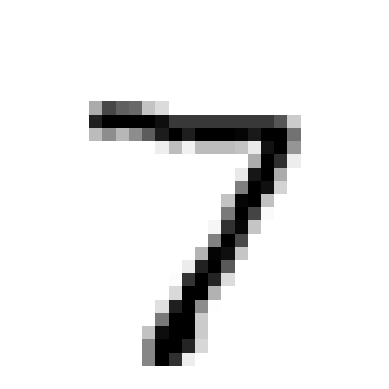

In [ ]:
plot_digit(X[60000])

In [ ]:
y[60000]

'7'

# Data Spliting

In [ ]:
X_train , X_test , y_train , y_test = X[:60000], X[60000:] , y[:60000] , y[60000:]

# **1. Binary Classification**


---



In [ ]:
y_train_7 = (y_train == '7')
y_test_7 = (y_test == '7')

In [ ]:
from sklearn .linear_model import SGDClassifier

In [ ]:
sgd_classifier = SGDClassifier(random_state = 42)
sgd_classifier.fit(X_train , y_train_7)

SGDClassifier(random_state=42)

In [ ]:
sgd_classifier.predict([X[60000]])

array([ True])

# Performance Measure
* **Using k-fold cross-validation**
k-fold cross-validation means splitting the training set into k folds (in this case, three), then
training the model k times, holding out a different fold each time for evaluation
* `cross_val_score`


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(sgd_classifier , X_train , y_train_7 , cv = 3 , scoring = "accuracy")

array([0.98105, 0.9735 , 0.95335])

* This is not the right way to evaluate . Because the data has only about 10% of 7 . Even if you blindely say false all the time you will be correct for about 90% of the time.
* This demonstrates why accuracy is generally not the preferred performance measure for classifiers, especially when you are dealing with skewed datasets (i.e., when someclasses are much more frequent than others).
* A much better way to evaluate the
performance of a classifier is to look at the **confusion matrix** (CM).

# **Using k-fold `cross_val_predict`**

Here’s how cross_val_predict works:

* Split the data into k folds (as specified by the cross-validation strategy).

* For each fold, train the model on the remaining k-1 folds.

* Predict the labels for the data in the held-out fold.

* Combine the predictions for all folds.

In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:
y_train_pred = cross_val_predict(sgd_classifier , X_train , y_train_7 , cv = 3)

# **CONFUSION MATRIX**

|                       | Predicted  Negative | Predicted  Positive |
|-----------------------|-----------------|-----------------|
| **Actual Negative** |       TN        |      FP        |
| **Actual Positive** |      FN         |       TP        |


***Recall*** is also called ***sensitivity*** , ***true positive rate (TPR)***

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_train_7 , y_train_pred)
cm

array([[52581,  1154],
       [  688,  5577]])

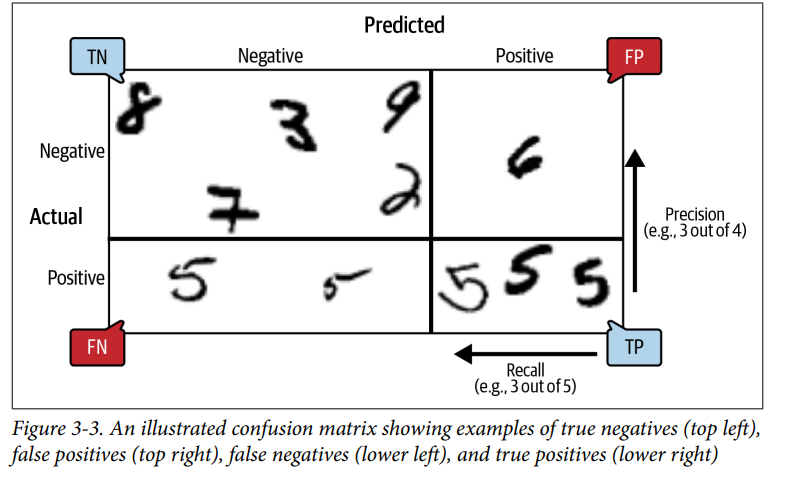

In [ ]:
from sklearn.metrics import precision_score , recall_score , f1_score

In [ ]:
print(f"Precision = {precision_score(y_train_7 , y_train_pred)}")

Precision = 0.8285544495617293


In [ ]:
print(f"Recall = {recall_score(y_train_7 , y_train_pred)}")

Recall = 0.8901835594573024


In [ ]:
print(f"F1 Score = {f1_score(y_train_7 , y_train_pred)}")

F1 Score = 0.8582640812557709


# Observations
* K-fold Cross validation is not ideal way for evaluating classification task.
* Confusion matrix is the way to go .
* Precision of 0.8285 means the model is only **82.85% times correct** when it claims the digit to be 7
* Recall of 0.8901 means the model is only able to **detect 89.01%** of 7s.
*  Increasing precision reduces recall, and
vice versa. This is called the ***precision/recall trade-off***.

# The precision recall trade-off
* If we increase the threshold the precision increases but the recall decreases
* If we decrease the threshold the recall increases but the precision decreases

* Using `method = "decision_function"` in `cross_val_predict` will give you the value of each instance calculated by the model (ie ; Sigmoid function) in the `sgd_classifier` model.

* We want a good value of precision and recall . Both should be as high as possible .
* Precision and recall both are dependent on the value of the threshold .
* So we need to plot the graph of three and decide what value to chose.

In [ ]:
y_score = cross_val_predict(sgd_classifier , X_train , y_train_7 , cv = 3 , method = "decision_function")

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
precisions , recalls , thresholds = precision_recall_curve(y_train_7 , y_score)

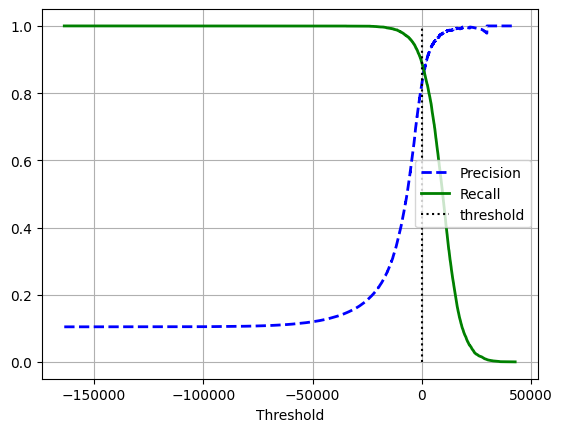

In [ ]:
threshold = 0
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
plt.grid()
plt.legend(loc="center right")
plt.xlabel("Threshold")
plt.show()

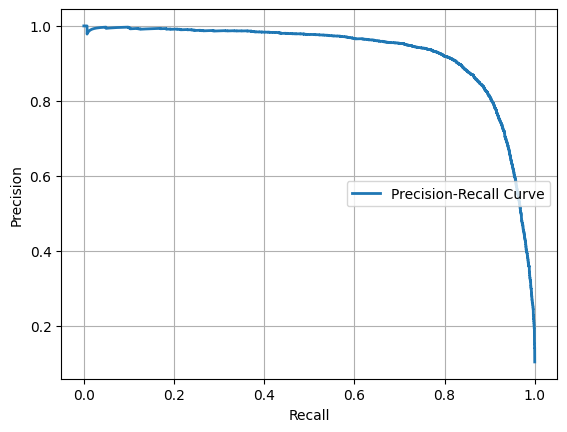

In [ ]:
plt.plot(recalls , precisions , linewidth = 2 , label = "Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.legend(loc="center right")
plt.show()

Suppose I wish to pick the **minimum value threshold** that gives me 90% precision.

In [ ]:
import numpy as np

In [ ]:
thresholds[0] , precisions[0] , recalls[0]

(-163657.52830886433, 0.10441666666666667, 1.0)

In [ ]:
idx_90_precision = np.argmax(precisions >= 0.9)
threshold_90_precision = thresholds[idx_90_precision]
threshold_90_precision , precisions[idx_90_precision] , recalls[idx_90_precision]

(2288.724768166237, 0.9000864304235091, 0.8311252992817239)

In [ ]:
y_train_pred_90 = (y_score >= threshold_90_precision)

In [ ]:
precision_score(y_train_7 , y_train_pred_90)

0.9000864304235091

In [ ]:
recall_score(y_train_7 , y_train_pred_90)

0.8311252992817239

This is much better

# Receiver operating characteristics (ROC) Curve
* Plot for Recall(TPR) vs false positive rate(FPR)

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fpr , tpr , threshold = roc_curve(y_train_7 , y_score)

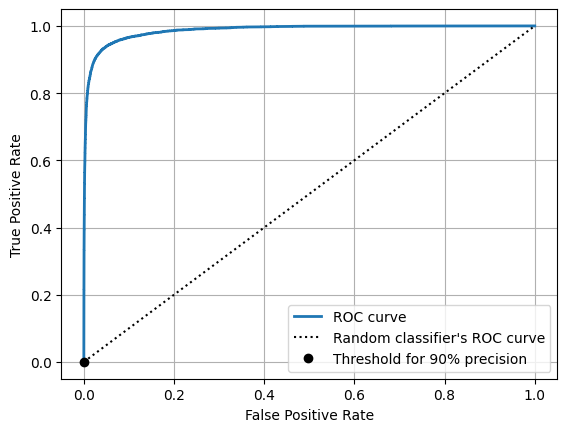

In [ ]:
idx_for_threshold_at_90 = (thresholds <= threshold_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")
plt.legend(loc = "lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.show()


* The dotted line represents the ROC curve of a purely
random classifier . A good classifier stays as far away from that line as possible

* A way to compare classifiers is to measure **Area under the ROC Curve (ROC AUC)**
* AUC for perfect classifier = 1
* AUC for random classifier = 0.5

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_train_7 , y_score)

0.986670497551944

**TIP** - **NOTHING'S PERFECT**

Since the ROC curve is so similar to the precision/recall (PR)
curve, you may wonder how to decide which one to use. As a rule
of thumb, you should prefer the PR curve whenever the positive
class is rare or when you care more about the false positives than
the false negatives. Otherwise, use the ROC curve. For example,
looking at the previous ROC curve (and the ROC AUC score),
you may think that the classifier is really good. But this is mostly
because there are few positives (7s) compared to the negatives
(non-7s). In contrast, the PR curve makes it clear that the classifier
has room for improvement: the curve could really be closer to the
top-right corner

# Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest_classifier = RandomForestClassifier(random_state = 42)

In [ ]:
y_probas_forest = cross_val_predict(forest_classifier , X_train , y_train_7 , cv = 3 , method = "predict_proba")

* Random Forest Classifier does not have a `decision_function()` . Instead it has `predict_proba()` function that returns class probabilities for each instance.
* Scikit-Learn classifiers always have either a decision_function() method or a predict_proba() method, or
sometimes both.


In [ ]:
y_probas_forest[0 : 5]

array([[0.98, 0.02],
       [1.  , 0.  ],
       [0.89, 0.11],
       [1.  , 0.  ],
       [0.95, 0.05]])

* The probability of first image being 7 is 2% and not being 7 is 98% according to the model.
* The second column says the probalility of being positive.

In [ ]:
y_score_forest = y_probas_forest[ :,1] # we treat it like threshold

In [ ]:
precisions_forest , recalls_forest , thresholds_forest = precision_recall_curve(y_train_7 , y_score_forest)

# Comparing the two classifiers
We will compare the two models on these basis
1. We will plot the **PR Curve** for both the classifiers
2. F1 Score
3. AUC ROC
4. Precision
5. Recall




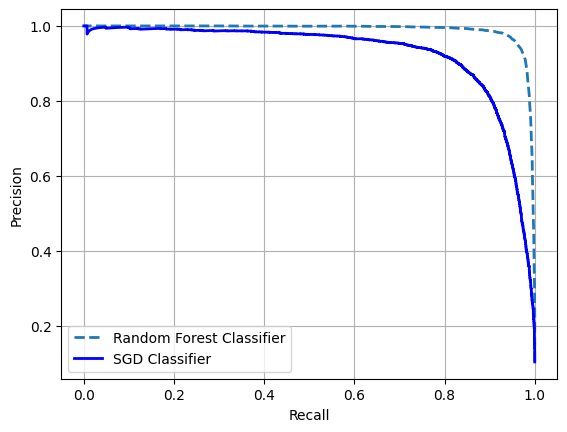

In [ ]:
plt.plot(recalls_forest , precisions_forest ,"--" , linewidth = 2 , label = "Random Forest Classifier")
plt.plot(recalls , precisions ,"b-", linewidth = 2 , label = "SGD Classifier")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.legend(loc="lower left")
plt.show()

In [ ]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5

In [ ]:
f1_score(y_train_7 , y_train_pred_forest)

0.9454182935947496

In [ ]:
roc_auc_score(y_train_7 , y_score_forest)

0.9982747530426836

In [ ]:
precision_score(y_train_7 , y_train_pred_forest)

0.9857934857934858

In [ ]:
recall_score(y_train_7 , y_train_pred_forest)

0.9082202713487629

**Random forest outshines SGD Classifier**

# **2**. **Multiclass classification**

---



| **Multiclass classifiers**   | **Binary classifiers**    |
|--------------------------|-----------------------|
| LogisticRegression       |  SGDClassifier        |
| RandomForestClassifier   |    SVC                |               
| GaussianNB               |                       |


|         OvR          |         OvO          |
|----------------------|----------------------|
| Traning 10 binary classifiers | Binary classifier for each pair of digits

In [ ]:
sgd_Classifier = SGDClassifier(random_state = 42)
sgd_Classifier.fit(X_train , y_train)

SGDClassifier(random_state=42)

In [ ]:
sgd_Classifier.predict([X[60000]])

array(['7'], dtype='<U1')

# Error Analysis

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
y_train_pred = cross_val_predict(sgd_Classifier , X_train , y_train , cv = 3)

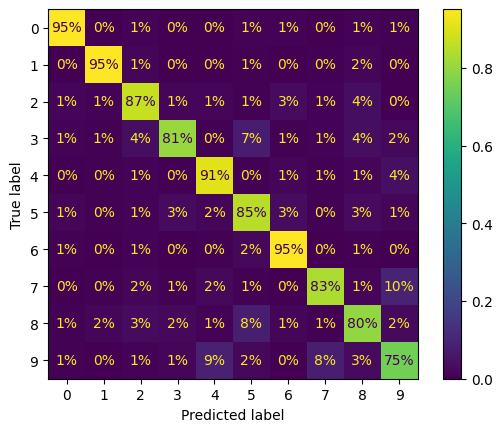

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train , y_train_pred , normalize = 'true' , values_format = ".0%")
plt.show()

In [ ]:
sample_weight = y_train_pred != y_train

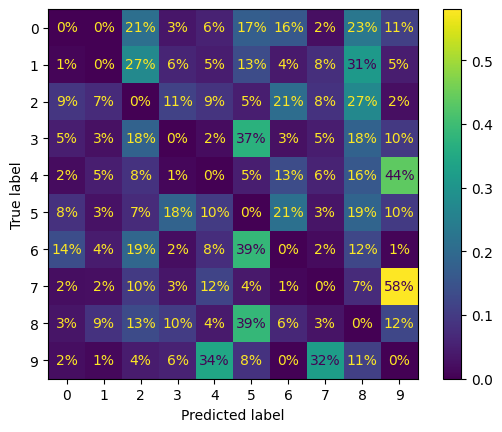

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train , y_train_pred ,sample_weight=sample_weight, normalize = 'true' , values_format = ".0%")
plt.show()

The 58% in row #7, column #9
does not mean that 58% of all images of 7s were misclassified as 9s. It means that 58%
of the errors the model made on images of 7s were misclassifications as 9s.

# **3. Exercise**

---


1.  Try to build a classifier for the MNIST dataset that achieves over 97% accuracy
on the test set. Hint: the KNeighborsClassifier works quite well for this task;
you just need to find good hyperparameter values (try a grid search on the
weights and n_neighbors hyperparameters).

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
knc = KNeighborsClassifier(n_neighbors=3)

In [ ]:
full_pipeline = Pipeline([
    ("scaler" , StandardScaler()),
    ("knc" , knc)
])
hyperparameters = {
    "knc__weights" : ["uniform" , "distance"],
    "knc__n_neighbors" : [3,4,5]
}
grid_search = GridSearchCV(full_pipeline , hyperparameters , cv = 3 , scoring="accuracy")
grid_search.fit(X_train , y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knc',
                                        KNeighborsClassifier(n_neighbors=3))]),
             param_grid={'knc__n_neighbors': [3, 4, 5],
                         'knc__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
grid_search.best_params_

{'knc__n_neighbors': 4, 'knc__weights': 'distance'}

In [ ]:
knc2 = KNeighborsClassifier(n_neighbors=4 , weights='distance')

In [ ]:
knc2.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [ ]:
y_pred_test = knc2.predict(X_test)

In [ ]:
y_pred_test[ : 5] , y_test[ : 5]

(array(['7', '2', '1', '0', '4'], dtype=object),
 array(['7', '2', '1', '0', '4'], dtype=object))

In [ ]:
precision_score(y_test , y_pred_test , average='micro')

0.9714

### Mission Accomplished ✅

2. Write a function that can shift an MNIST image in any direction (left, right, up,
or down) by one pixel.6
 Then, for each image in the training set, create four
shifted copies (one per direction) and add them to the training set. Finally, train
your best model on this expanded training set and measure its accuracy on the
test set. You should observe that your model performs even better now! This
technique of artificially growing the training set is called data augmentation or
training set expansion.
